## 
http://web.archive.org/web/20201109012938/http://tech.labs.oliverwyman.com/blog/2008/11/14/tracing-python-memory-leaks

pdb ./myserver.py  
r   
ctrl + c  
然后用heapy   

https://smira.ru/wp-content/uploads/2011/08/heapy.html

# 先找到most common types和对应的module，使用find_backref_chain

In [1]:
import objgraph

In [2]:
class MyBigFatObject(object):
    pass

def computate_something(_cache={}):
    _cache[42] = dict(foo=MyBigFatObject(),
                      bar=MyBigFatObject())
    # a very explicit and easy-to-find "leak" but oh well
    x = MyBigFatObject() # this one doesn't leak

In [3]:
objgraph.show_growth(limit=3)

function    24108    +24108
dict        14323    +14323
tuple       12650    +12650


In [4]:
computate_something()
objgraph.show_growth() 

dict              14328        +5
weakref            5523        +4
list               7177        +3
MyBigFatObject        2        +2
Socket                9        +1
Expr                  2        +1
Call                  2        +1
Name                  2        +1


In [5]:
import random
objgraph.show_chain(
    objgraph.find_backref_chain(
        random.choice(objgraph.by_type('MyBigFatObject')),
        objgraph.is_proper_module),
    filename='chain.png')

Graph written to /tmp/objgraph-xf3o82o7.dot (7 nodes)
Image generated as chain.png


In [6]:
a = {'/dev/mmcblk0p25', '/dev/hidraw2', '/dev/capture-vi-channel12', '/dev/ptyp9', '/dev/nvhost-msenc', '/dev/ram15', '/dev/i2c-8', '/dev/capture-vi-channel19', '/dev/tty2', '/dev/l3cache', '/dev/keychord', '/dev/tty18', '/dev/rtc1', '/dev/nvhost-ctrl-nvdla1', '/dev/uinput', '/dev/capture-isp-channel9', '/dev/nvhost-prof-gpu', '/dev/network_latency', '/dev/capture-isp-channel17', '/dev/nvhost-ctrl-nvdec', '/dev/capture-isp-channel34', '/dev/mmcblk0p17', '/dev/tty10', '/dev/tty60', '/dev/rtc', '/dev/capture-isp-channel32', '/dev/ttyS3', '/dev/capture-isp-channel16', '/dev/mmcblk0p10', '/dev/max_online_cpus', '/dev/capture-isp-channel28', '/dev/tty54', '/dev/ttyp4', '/dev/vfio', '/dev/capture-isp-channel61', '/dev/i2c-6', '/dev/nvhost-nvcsi', '/dev/tty51', '/dev/ptypf', '/dev/net', '/dev/capture-vi-channel13', '/dev/ptp0', '/dev/null', '/dev/capture-isp-channel53', '/dev/capture-isp-channel63', '/dev/ptypb', '/dev/capture-isp-channel10', '/dev/tty7', '/dev/camchar-dbg', '/dev/capture-isp-channel55', '/dev/gpiochip1', '/dev/ram11', '/dev/ram10', '/dev/cpu_freq_max', '/dev/capture-vi-channel11', '/dev/tty29', '/dev/capture-isp-channel50', '/dev/capture-vi-channel2', '/dev/nvhost-tsec', '/dev/zero', '/dev/spidev0.0', '/dev/gpiochip0', '/dev/tty41', '/dev/capture-isp-channel37', '/dev/tty63', '/dev/capture-vi-channel6', '/dev/capture-isp-channel0', '/dev/loop-control', '/dev/ptyp1', '/dev/tty47', '/dev/capture-vi-channel18', '/dev/tty26', '/dev/capture-isp-channel3', '/dev/capture-isp-channel23', '/dev/ptyp8', '/dev/capture-isp-channel5', '/dev/ttyp3', '/dev/nvmap', '/dev/ttyS1', '/dev/tty5', '/dev/cuse', '/dev/ttyTHS1', '/dev/tty52', '/dev/mmcblk0p13', '/dev/capture-isp-channel46', '/dev/kmem', '/dev/capture-isp-channel52', '/dev/tty27', '/dev/stdout', '/dev/full', '/dev/capture-vi-channel23', '/dev/tegra_cec', '/dev/mmcblk0p31', '/dev/mmcblk0p23', '/dev/tty33', '/dev/capture-isp-channel15', '/dev/mmcblk0p38', '/dev/network_throughput', '/dev/ttyp9', '/dev/tty57', '/dev/ptmx', '/dev/gpiochip2', '/dev/mmcblk0p5', '/dev/mmcblk0rpmb', '/dev/spidev0.1', '/dev/loop6', '/dev/capture-isp-channel18', '/dev/capture-isp-channel14', '/dev/capture-vi-channel22', '/dev/capture-vi-channel8', '/dev/iio:device1', '/dev/stdin', '/dev/tty25', '/dev/ptyp2', '/dev/nvhost-ctrl-nvcsi', '/dev/random', '/dev/mmcblk0p35', '/dev/capture-isp-channel31', '/dev/tty3', '/dev/capture-isp-channel27', '/dev/capture-vi-channel4', '/dev/capture-vi-channel16', '/dev/i2c-0', '/dev/mmcblk0p34', '/dev/capture-isp-channel43', '/dev/tty23', '/dev/tty15', '/dev/tty19', '/dev/ram6', '/dev/tty30', '/dev/nvhost-nvenc1', '/dev/zram4', '/dev/constraint_online_cpus', '/dev/capture-isp-channel57', '/dev/tty17', '/dev/capture-isp-channel21', '/dev/ptypc', '/dev/mmcblk0boot0', '/dev/cpu_freq_min', '/dev/mmcblk0p6', '/dev/capture-isp-channel29', '/dev/mmcblk0', '/dev/mqueue', '/dev/mmcblk0p8', '/dev/nvhdcp1', '/dev/nvhost-vi-thi', '/dev/tty53', '/dev/hugepages', '/dev/mmcblk0p7', '/dev/tty46', '/dev/capture-vi-channel17', '/dev/camchar-echo', '/dev/tty45', '/dev/watchdog', '/dev/loop5', '/dev/vcs5', '/dev/mapper', '/dev/tty20', '/dev/capture-isp-channel58', '/dev/nvhost-isp-thi', '/dev/capture-vi-channel27', '/dev/nvhost-isp', '/dev/tegra_mipi_cal', '/dev/capture-vi-channel7', '/dev/mmcblk0p1', '/dev/nvhost-sched-gpu', '/dev/capture-vi-channel31', '/dev/mmcblk0p24', '/dev/nvhost-ctrl', '/dev/capture-isp-channel4', '/dev/capture-vi-channel20', '/dev/constraint_gpu_freq', '/dev/nvhost-vi', '/dev/mmcblk0p15', '/dev/capture-isp-channel2', '/dev/i2c-4', '/dev/nvhost-nvdec1', '/dev/ttyTCU0', '/dev/mmcblk0p33', '/dev/tty34', '/dev/tty40', '/dev/mmcblk0p28', '/dev/ttyTHS0', '/dev/nvhost-dbg-gpu', '/dev/vcs2', '/dev/capture-isp-channel60', '/dev/nvhdcp0', '/dev/ram8', '/dev/tty11', '/dev/mmcblk0p41', '/dev/snd', '/dev/tty49', '/dev/capture-isp-channel26', '/dev/vcs1', '/dev/vcs4', '/dev/capture-vi-channel9', '/dev/capture-isp-channel59', '/dev/input', '/dev/tty61', '/dev/ttyp6', '/dev/mmcblk0p39', '/dev/nvhost-ctrl-pva0', '/dev/quadd_auth', '/dev/tty1', '/dev/capture-isp-channel36', '/dev/tty55', '/dev/rfkill', '/dev/ttypa', '/dev/capture-isp-channel45', '/dev/capture-isp-channel62', '/dev/rtc0', '/dev/constraint_cpu_freq', '/dev/tty32', '/dev/capture-isp-channel41', '/dev/nvhost-nvdec', '/dev/capture-isp-channel30', '/dev/nvhost-ctrl-gpu', '/dev/ram3', '/dev/capture-vi-channel32', '/dev/nvhost-tsecb', '/dev/tegra-crypto', '/dev/ptyp5', '/dev/mmcblk0p37', '/dev/tegra_dc_ctrl', '/dev/capture-isp-channel39', '/dev/mmcblk0p40', '/dev/mmcblk0p32', '/dev/tty', '/dev/mmcblk0p36', '/dev/ttyp2', '/dev/nvhost-ctrl-nvdec1', '/dev/nvhost-as-gpu', '/dev/capture-isp-channel22', '/dev/fuse', '/dev/nvhost-gpu', '/dev/tty9', '/dev/fd', '/dev/nvhost-nvdla0', '/dev/mmcblk0p26', '/dev/capture-isp-channel19', '/dev/log', '/dev/vcsa4', '/dev/pts', '/dev/capture-vi-channel14', '/dev/capture-isp-channel35', '/dev/capture-isp-channel42', '/dev/mmcblk0p20', '/dev/mmcblk0p22', '/dev/capture-vi-channel1', '/dev/min_online_cpus', '/dev/vcsa5', '/dev/ptyp3', '/dev/ptyp6', '/dev/tty4', '/dev/urandom', '/dev/hidraw1', '/dev/psaux', '/dev/tegra_dc_2', '/dev/mmcblk0boot1', '/dev/btrfs-control', '/dev/capture-isp-channel13', '/dev/mmcblk0p27', '/dev/zram7', '/dev/tty39', '/dev/tty13', '/dev/ptype', '/dev/hidraw0', '/dev/fb2', '/dev/gpu_freq_max', '/dev/mmcblk0p14', '/dev/disk', '/dev/ttyS0', '/dev/fb1', '/dev/ttyGS0', '/dev/quadd', '/dev/capture-vi-channel24', '/dev/loop7', '/dev/nvhost-pva1', '/dev/capture-isp-channel38', '/dev/tty35', '/dev/nvhost-ctrl-nvdla0', '/dev/vcsa', '/dev/vcs3', '/dev/tty0', '/dev/vcsa1', '/dev/vcsa3', '/dev/port', '/dev/trusty-ipc-dev0', '/dev/capture-vi-channel3', '/dev/tty24', '/dev/ttypb', '/dev/mmcblk0p29', '/dev/capture-isp-channel47', '/dev/capture-isp-channel1', '/dev/loop2', '/dev/capture-isp-channel51', '/dev/nvhost-tsg-gpu', '/dev/uhid', '/dev/bus', '/dev/ppp', '/dev/zram5', '/dev/ram4', '/dev/media0', '/dev/ptyp0', '/dev/tty31', '/dev/mmcblk0p12', '/dev/tty6', '/dev/capture-vi-channel28', '/dev/ttypc', '/dev/mmcblk0p16', '/dev/nvhost-vic', '/dev/nvhost-ctrl-isp', '/dev/tegra_camera_ctrl', '/dev/capture-isp-channel6', '/dev/tty14', '/dev/capture-vi-channel10', '/dev/tty12', '/dev/kmsg', '/dev/ram2', '/dev/ttyp7', '/dev/nvhdcp2', '/dev/ttyp1', '/dev/capture-vi-channel34', '/dev/ttyp5', '/dev/autofs', '/dev/tty8', '/dev/tegra_dc_0', '/dev/i2c-5', '/dev/ptyp4', '/dev/tty48', '/dev/capture-vi-channel29', '/dev/tty42', '/dev/capture-vi-channel21', '/dev/nvhost-nvjpg', '/dev/capture-isp-channel56', '/dev/ram1', '/dev/zram1', '/dev/i2c-3', '/dev/i2c-1', '/dev/initctl', '/dev/nvhost-pva0', '/dev/capture-vi-channel30', '/dev/capture-vi-channel26', '/dev/tegra_dc_1', '/dev/gpu_freq_min', '/dev/ram5', '/dev/tty56', '/dev/iio:device0', '/dev/ttypf', '/dev/ram13', '/dev/char', '/dev/console', '/dev/max_cpu_power', '/dev/capture-isp-channel48', '/dev/zram0', '/dev/ram0', '/dev/capture-vi-channel35', '/dev/capture-vi-channel15', '/dev/ttyTHS4', '/dev/capture-vi-channel25', '/dev/ptyp7', '/dev/capture-isp-channel40', '/dev/nvhost-nvdla1', '/dev/shm', '/dev/mmcblk0p42', '/dev/capture-isp-channel54', '/dev/capture-isp-channel12', '/dev/vcs6', '/dev/capture-isp-channel49', '/dev/cpu_dma_latency', '/dev/tty22', '/dev/zram6', '/dev/loop0', '/dev/mmcblk0p2', '/dev/capture-isp-channel24', '/dev/capture-vi-channel33', '/dev/capture-vi-channel0', '/dev/capture-isp-channel25', '/dev/ram14', '/dev/zram2', '/dev/nvhost-ctrl-pva1', '/dev/vcsa6', '/dev/loop4', '/dev/mmcblk0p4', '/dev/i2c-7', '/dev/emc_freq_min', '/dev/nvhost-ctxsw-gpu', '/dev/mmcblk0p3', '/dev/tty44', '/dev/ram9', '/dev/ttypd', '/dev/capture-isp-channel8', '/dev/ram12', '/dev/fb0', '/dev/ram7', '/dev/tty50', '/dev/capture-isp-channel33', '/dev/tty16', '/dev/tty36', '/dev/tty28', '/dev/mmcblk0p21', '/dev/capture-isp-channel44', '/dev/ptypd', '/dev/tty62', '/dev/memory_bandwidth', '/dev/tty58', '/dev/zram3', '/dev/tty38', '/dev/capture-isp-channel7', '/dev/i2c-2', '/dev/mmcblk0p9', '/dev/block', '/dev/tty43', '/dev/ptypa', '/dev/ttype', '/dev/tty21', '/dev/mmcblk0p19', '/dev/ttyS2', '/dev/mem', '/dev/vcsa2', '/dev/ttyp0', '/dev/loop1', '/dev/tty59', '/dev/max_gpu_power', '/dev/capture-vi-channel5', '/dev/watchdog0', '/dev/tty37', '/dev/vcs', '/dev/vhci', '/dev/capture-isp-channel20', '/dev/capture-isp-channel11', '/dev/mmcblk0p30', '/dev/stderr', '/dev/mmcblk0p18', '/dev/mmcblk0p11', '/dev/loop3', '/dev/ttyp8'}

437

In [5]:
from collections import defaultdict
from tqdm import tqdm
from onceorauto.utils.log_func import timefunc
@timefunc(everyline=True)
def print_most_common_module():
    count_all = {}
    for t, num in tqdm(objgraph.most_common_types(10)):
        count_per_t = defaultdict(int)
        for obj in objgraph.by_type(t)[:100]:
            a = objgraph.find_backref_chain(obj, objgraph.is_proper_module)
            if objgraph.is_proper_module(a[0]):
                count_per_t[a[0].__name__] += 1
        count_all[t] = count_per_t
    return count_all
print_most_common_module()

100%|██████████| 10/10 [03:52<00:00, 23.28s/it]

Timer unit: 1 s

Total time: 232.949 s
File: <ipython-input-5-afd4f2f26055>
Function: print_most_common_module at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           @timefunc(everyline=True)
     5                                           def print_most_common_module():
     6         1          0.0      0.0      0.0      count_all = {}
     7        11          0.2      0.0      0.1      for t, num in tqdm(objgraph.most_common_types(10)):
     8        10          0.0      0.0      0.0          count_per_t = defaultdict(int)
     9      1010          0.8      0.0      0.3          for obj in objgraph.by_type(t)[:100]:
    10      1000        232.0      0.2     99.6              a = objgraph.find_backref_chain(obj, objgraph.is_proper_module)
    11      1000          0.0      0.0      0.0              if objgraph.is_proper_module(a[0]):
    12       585          0.0      0.0      0.0                  count_per_t[a[0]

{'function': defaultdict(int,
             {'line_profiler': 17,
              'multiprocessing.synchronize': 40,
              'multiprocessing.util': 1,
              'onceorauto.utils.log_func': 6,
              'termcolor': 1,
              '__main__': 3,
              'line_profiler.line_profiler': 3,
              'onceorauto.utils.logger': 5,
              'tornado.ioloop': 1,
              'importlib._bootstrap': 9}),
 'dict': defaultdict(int,
             {'jedi.inference.compiled.access': 1, 'builtins': 1, 'sys': 1}),
 'tuple': defaultdict(int,
             {'tornado.ioloop': 1,
              'importlib._bootstrap': 11,
              'builtins': 4,
              'importlib._bootstrap_external': 19,
              'io': 1,
              'zipimport': 1,
              'sys': 15,
              'codecs': 15,
              'encodings': 1,
              'encodings.utf_8': 8,
              '_signal': 1,
              'encodings.latin_1': 12}),
 'list': defaultdict(int,
             {'

In [6]:
a = defaultdict(int)
a['main'] += 1
a['local'] += 1
b = {}
b['func'] = a

# 找到可能leak的object，先观察可能是哪个(print即可)，找到它的reference，这个就需要手动了

In [7]:
roots = objgraph.get_leaking_objects()
objgraph.show_most_common_types(objects=roots) # typestats(roots) then sort  is most_common_types, then show is this func

dict                       1534
list                       333
tuple                      43
method                     11
SignalDict                 8
builtin_function_or_method 6
weakref                    5
Enum                       5
frame                      4
list_iterator              3


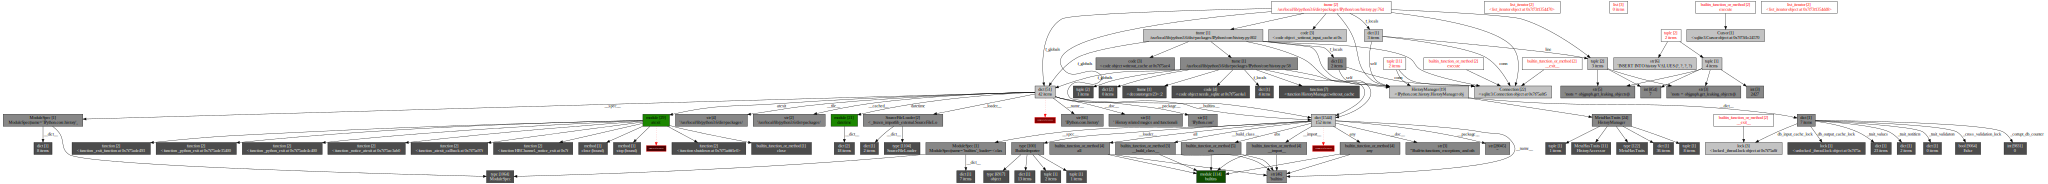

In [33]:
objgraph.show_refs(roots[:10], refcounts=True)

In [29]:
# objgraph.show_chain(
#     objgraph.find_backref_chain(
#         random.choice(objgraph.by_type('dict', objects=roots)),
#         objgraph.is_proper_module),
#     filename='chain.png')

{'tuple': 43,
 'builtin_function_or_method': 6,
 'frame': 4,
 'list_iterator': 3,
 'list': 333,
 'dict': 1534,
 'weakref': 5,
 'Del': 1,
 'AugLoad': 1,
 'AugStore': 1,
 'Param': 1,
 'And': 1,
 'Or': 1,
 'Add': 1,
 'Sub': 1,
 'Mult': 1,
 'MatMult': 1,
 'Div': 1,
 'Mod': 1,
 'Pow': 1,
 'LShift': 1,
 'RShift': 1,
 'BitOr': 1,
 'BitXor': 1,
 'BitAnd': 1,
 'FloorDiv': 1,
 'Invert': 1,
 'Not': 1,
 'UAdd': 1,
 'USub': 1,
 'Eq': 1,
 'NotEq': 1,
 'Lt': 1,
 'LtE': 1,
 'Gt': 1,
 'GtE': 1,
 'Is': 1,
 'IsNot': 1,
 'In': 1,
 'NotIn': 1,
 'WeakSet': 1,
 'SignalDict': 8,
 'method': 11,
 'slice': 2,
 'Enum': 5,
 'MaskedArray': 1,
 'function': 2,
 'coroutine': 2}